# Figure 3


In [1]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

data_dir = './../../DataAndScripts/experimental_data/'

data_monkeys=np.loadtxt(data_dir+'Monkeys_with_trials.txt');
data_mice=np.loadtxt(data_dir+'Mice_with_trials.txt');


# structure of data set is:
# unit number, contrast, laser, rate, other stuff

DATA=[data_mice,data_monkeys]
species=['Mice','Monkeys']
color=['c','m']
bin_edges=np.arange(-300,300,0.1) 
bin_means=(bin_edges[1::]+bin_edges[0:-1])/2   


area=4.0;linethicknes=1.0;
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42


N_stat=10**3;


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    print(Con)

[ 0.  8. 13. 21. 34. 55. 90.]
[ 0.  6. 12. 25. 50. 99.]


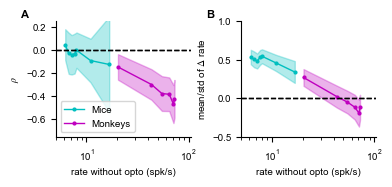

In [3]:
rows=1
cols=2
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), 
                        facecolor='w', edgecolor='k')#,sharex='col')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


axs[0].text(-.2, 1.1,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.1,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');

for idx in [0,1,]:
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    
    
label=['Mice','Monkeys']
idx_laser=-1
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    Las=np.unique(data[:,2])
    cells_id=np.unique(data[:,0]);

    Las=[Las[0],Las[-1]]
    Cell_Resp=np.zeros((len(cells_id),len(Con),len(Las),))
    for idx_cell in range(len(cells_id)):
        for idx_con in range(len(Con)):
            for idx_las in range(len(Las)):
                mask=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[idx_las])&(data[:,1]==Con[idx_con])
                Trial_Resp=data[mask,3::]
                Cell_Resp[idx_cell,idx_con,idx_las]=np.mean(Trial_Resp[np.isnan(Trial_Resp)==False])

    Bootstrap_idx=np.random.choice(np.arange(len(cells_id)),size=(len(cells_id),N_stat), replace=True)
    Bootstrap_Resp=np.zeros((N_stat,len(cells_id),len(Con),len(Las)))
    for idx_rep in range(N_stat):
        for idx_con in range(len(Con)):
            for idx_las in range(len(Las)):
                Bootstrap_Resp[idx_rep,:,idx_con,idx_las]= Cell_Resp[[Bootstrap_idx[:,idx_rep]],idx_con,idx_las]

        
    Base=Bootstrap_Resp[:,:,:,0]
    Delta=Bootstrap_Resp[:,:,:,-1]-Bootstrap_Resp[:,:,:,0]
    Measurements_X=np.mean(Base,axis=1)
    Moments_X=np.zeros((len(Con),2))
    for idx_con in range(len(Con)): 
        Moments_X[idx_con,:]=np.mean(Measurements_X[:,idx_con]),np.std(Measurements_X[:,idx_con])
    for idx_cases in range(2):
        if (idx_cases==1):
            Measurements_Y=np.mean(Delta,axis=1)/np.std(Delta,axis=1)
        if (idx_cases==0):
            # rho rates Delta rates           
            Measurements_Y=np.zeros((N_stat,len(Con)))
            for idx_rep in range(N_stat):
                for idx_con in range(len(Con)): 
                    pippo=np.cov(Base[idx_rep,:,idx_con],Delta[idx_rep,:,idx_con])
                    Measurements_Y[idx_rep,idx_con]=pippo[0,1]/pippo[1,1]
        Moments_Y=np.zeros((len(Con),2))
        for idx_con in range(len(Con)): 
            Moments_Y[idx_con,:]=np.mean(Measurements_Y[:,idx_con]),np.std(Measurements_Y[:,idx_con])
        m,sem=Moments_Y[:,0],Moments_Y[:,1]
        axs[idx_cases].plot(Moments_X[:,0],m,c=color[idx_species],lw=linethicknes, marker='o', markersize=2,label=label[idx_species],)
        axs[idx_cases].fill_between(Moments_X[:,0],m-sem,m+sem,color=color[idx_species],alpha=0.3)

    axs[0].set_xscale('log')
    axs[0].axis([5.,105,-0.75,.25])
    axs[0].axhline(y=0,ls='--',c='k')
    axs[0].set_ylabel(r'$\rho$')
    axs[0].set_xlabel('rate without opto (spk/s)')
    axs[0].legend(loc='lower left')   #prop={'size': 6},     
    axs[1].set_xscale('log')
    axs[1].axis([5.,105,-0.5,1])
    axs[1].axhline(y=0,ls='--',c='k')
    axs[1].set_ylabel(r'mean/std of $\Delta$ rate')
    axs[1].set_xlabel('rate without opto (spk/s)')
    
plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
pic_name='Figure_3.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight')
pic_name='Figure_3.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)




## 